# Theory of Diffusion Models

## Overview
Diffusion models approximate a data distribution $ p(x) $ by learning a generative process that transforms simple noise into samples resembling the data. This process consists of:
1. **Forward Process (Diffusion):** Gradually adds noise to data until it becomes pure Gaussian noise.
2. **Reverse Process (Generation):** Gradually removes noise to reconstruct the original data.

---

## Mathematical Formulation

### Forward Process
The forward process is a predefined Markov chain that transforms data $ x_0 \sim p(x_0) $ into a noise distribution $ x_T $ (e.g., Gaussian) over $ T $ steps. Each step adds Gaussian noise:

$$
q(x_t \mid x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1 - \alpha_t) \mathbf{I}),
$$

where:
- $ \alpha_t \in (0, 1) $ is the noise variance schedule.
- $ x_t $ represents the data at time $ t $.

The forward process for any arbitrary step $ t $ is:

$$
q(x_t \mid x_0) = \mathcal{N}(x_t; \sqrt{\bar{\alpha}_t} x_0, (1 - \bar{\alpha}_t) \mathbf{I}),
$$

where $ \bar{\alpha}_t = \prod_{s=1}^t \alpha_s $. This enables directly sampling $ x_t $ from $ x_0 $.

---

### Reverse Process
The reverse process is another Markov chain that attempts to reverse the forward process:

$$
p_\theta(x_{t-1} \mid x_t) = \mathcal{N}(x_{t-1}; \mu_\theta(x_t, t), \Sigma_\theta(x_t, t)),
$$

where $ \mu_\theta $ and $ \Sigma_\theta $ are parameterized by a neural network $ \theta $. The reverse process starts with $ x_T \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $ and generates $ x_{T-1}, x_{T-2}, \ldots, x_0 $.

Instead of directly predicting $ \mu_\theta(x_t, t) $, models often predict the noise $ \epsilon_\theta(x_t, t) $:

$$
x_{t-1} = \frac{1}{\sqrt{\alpha_t}} \left( x_t - \frac{1 - \alpha_t}{\sqrt{1 - \bar{\alpha}_t}} \epsilon_\theta(x_t, t) \right) + \sigma_t \mathbf{z},
$$

where $ \sigma_t $ is the noise variance, and $ \mathbf{z} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $.

---

## Training Objective
The reverse process is trained to minimize the **variational lower bound (VLB)** of the data likelihood:

$$
\log p_\theta(x_0) \geq \mathbb{E}_q \left[ \log \frac{p_\theta(x_0, x_1, \ldots, x_T)}{q(x_1, \ldots, x_T \mid x_0)} \right].
$$

Decomposing this bound gives:

$$
\mathcal{L}_{\text{VLB}} = \mathcal{L}_T + \sum_{t=2}^T \mathcal{L}_{t-1} + \mathcal{L}_0,
$$

where:
- $ \mathcal{L}_T $: Matches the prior $ p(x_T) $ to the forward process $ q(x_T) $.
- $ \mathcal{L}_{t-1} $: KL divergence between $ p_\theta(x_{t-1} \mid x_t) $ and $ q(x_{t-1} \mid x_t, x_0) $.
- $ \mathcal{L}_0 $: Reconstruction loss for $ x_0 $.

The simplified loss focuses on noise prediction:

$$
\mathcal{L}_{\text{simple}} = \mathbb{E}_{x_0, \epsilon, t} \left[ \| \epsilon - \epsilon_\theta(x_t, t) \|^2 \right],
$$

where $ \epsilon \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $.

---

## Noise Schedules
The variance schedule $ \alpha_t $ determines the diffusion process. Popular schedules include:
- **Linear Schedule:** Linearly increases variance.
- **Cosine Schedule:** Smoother transitions improve performance.
- **Learned Schedules:** Adapted during training.

---

## Sampling
Sampling involves running the reverse process starting from $ x_T \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $:
1. Predict noise $ \epsilon_\theta(x_t, t) $.
2. Compute $ x_{t-1} $ using the noise prediction formula.
3. Repeat until $ t = 0 $ to obtain $ x_0 $.

---

## Extensions
1. **Denoising Diffusion Implicit Models (DDIM):** Deterministic sampling for faster inference.
2. **Latent Diffusion Models (LDMs):** Operate in a compressed latent space, reducing computation (e.g., Stable Diffusion).
3. **Guided Diffusion:** Incorporates external information (e.g., text) to steer generation, as in classifier-free guidance.

---

## Applications
- **Image Generation:** High-quality image synthesis (e.g., Stable Diffusion, Imagen).
- **Audio Synthesis:** Speech and music generation (e.g., DiffWave).
- **3D Modeling:** Molecular and 3D structure generation.
- **Multimodal Generation:** Text-to-image or video synthesis.




# Get All Your Imports

In [1]:
import urllib
import PIL
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import torchvision
import math

In [2]:
# What device are you using?
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# What Image Do You Want To Use To Train Your Diffusion Model

In [3]:
# Put the Link For the Image Here
url = "https://upload.wikimedia.org/wikipedia/commons/7/74/A-Cat.jpg"
urllib.request.urlretrieve(url, "cat.jpg")
images = PIL.Image.open("cat.jpg")

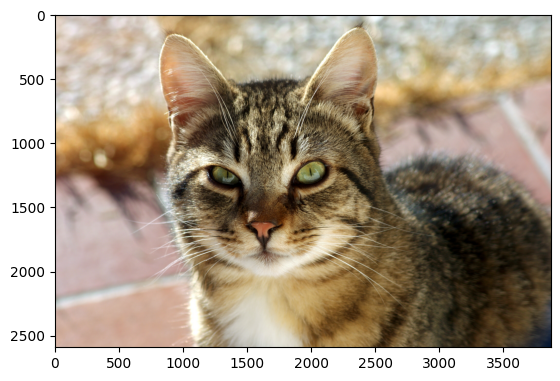

In [4]:
# Check Out the Image
plt.imshow(images)

# Lets Start With The Forward Diffusion Process (It is Fixed Markov Chain)

In [5]:
def diffusion_forward(x_0, t):
    # Create a sequence of timesteps ranging from 0 to t-1
    timesteps = # TODO

    # Generate random Gaussian noise with the same shape as x_0
    noise = # TODO

    # Linearly interpolate beta values from 0 to 1 over t timesteps
    betas = # TODO

    # Compute alpha values as 1 - beta for each timestep
    alphas = # TODO

    # Compute the cumulative product of alphas to obtain alpha_hat values
    # This represents the cumulative scaling factor for the original data x_0 over time
    alphas_hat = # TODO

    # Gather the corresponding alpha_hat values for each timestep
    # Reshape the tensor to match the input shape for broadcasting during computation
    alphas_hat_t = alphas_hat.gather(-1, timesteps).reshape(-1, 1, 1, 1)

    # Compute the mean component for the forward process
    # This is the scaled version of the input data x_0
    mean = # TODO

    # Compute the variance component for the forward process
    # This scales the Gaussian noise by the complementary factor of alpha_hat
    variance = # TODO

    # Return the noisy data (mean + variance) and the noise used
    return mean + variance, noise


In [7]:
# Define the desired image shape for processing
IMAGE_SHAPE = (32, 32)

# Transformations applied to the input images
transform = transforms.Compose([
    # Resize the image to the specified shape
    transforms.Resize(IMAGE_SHAPE),

    # Convert the PIL image to a tensor with values in the range [0, 1]
    transforms.ToTensor(),

    # Scale the tensor values to the range [-1, 1] by applying the transformation: (t * 2) - 1
    transforms.Lambda(lambda t: (t * 2) - 1),
])

# Reverse transformations to convert the processed tensor back into a human-readable image format
reverse_transforms = transforms.Compose([
    # Scale the tensor values back to the range [0, 1] by applying the inverse transformation: (t + 1) / 2
    transforms.Lambda(lambda t: (t + 1) / 2),

    # Rearrange the dimensions of the tensor from (C, H, W) to (H, W, C) for visualization
    transforms.Lambda(lambda t: t.permute(1, 2, 0)),

    # Scale the tensor values to the range [0, 255] for pixel intensity
    transforms.Lambda(lambda t: t * 255.0),

    # Convert the tensor to a NumPy array of type uint8 (integer pixel values)
    transforms.Lambda(lambda t: t.cpu().numpy().astype(np.uint8)),

    # Convert the NumPy array back to a PIL image for further processing or display
    transforms.ToPILImage()
])


In [8]:
t = 10  # Number of timesteps in the diffusion process

# Apply the transformation pipeline to preprocess the image
img = transform(images)

# Stack the same image `t` times to create a batch of identical images for diffusion
batches_image = torch.stack([img] * t)

# Pass the batch of images through the diffusion forward process
# This returns:
# - `noisy_image`: The images after adding Gaussian noise over `t` timesteps
# - `noise`: The noise added to the images during the forward diffusion process
noisy_image, noise = diffusion_forward(batches_image, t)


In [11]:
timesteps = torch.arange(t)

<Figure size 1500x1500 with 0 Axes>

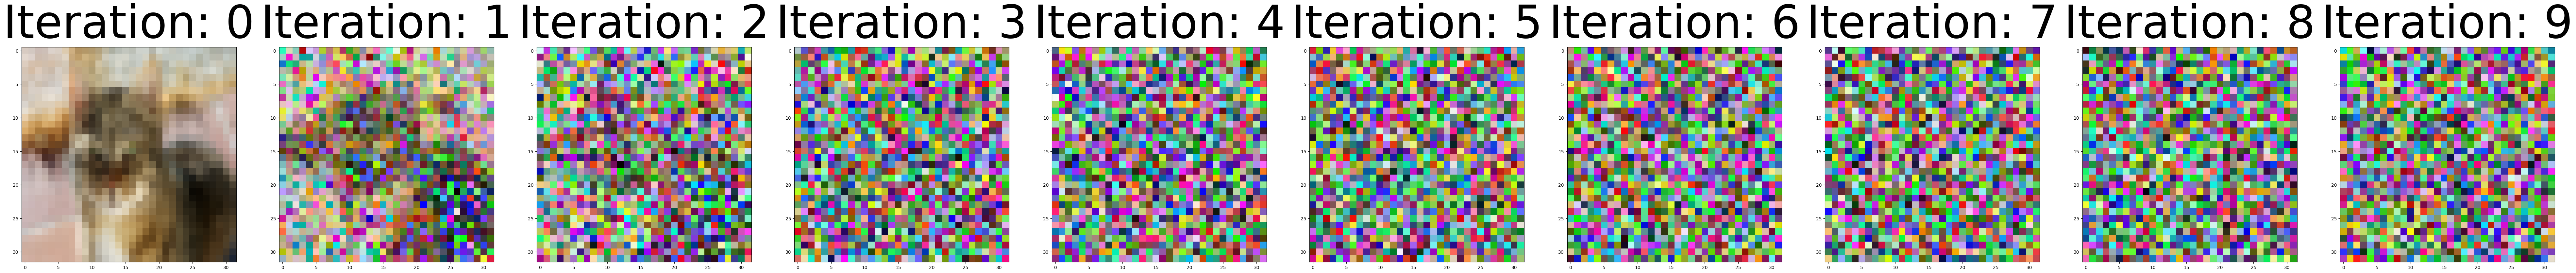

In [12]:
plt.figure(figsize=(15,15))
f, ax = plt.subplots(1, t, figsize=(100,100))

for idx, image in enumerate(noisy_image):
  # print(reverse_transforms(image))
  ax[idx].imshow(reverse_transforms(image))
  ax[idx].set_title(f"Iteration: {timesteps[idx].item()}", fontsize=100)

plt.show()


# Plots for the Histogram of Ground Truth Noise

In [22]:

def plot_noise_distribution(noise, predicted_noise):
    """
    Plots the distribution of the ground truth noise and the predicted noise
    using histograms for comparison.

    Args:
        noise (torch.Tensor): Ground truth noise tensor.
        predicted_noise (torch.Tensor): Predicted noise tensor.
    """
    plt.figure(figsize=(10, 6))  # Create a figure with specified size

    # Plot histogram for ground truth noise
    plt.hist(
        noise.cpu().numpy().flatten(),  # Convert tensor to NumPy, flatten to 1D
        density=True,  # Normalize histogram to represent density
        alpha=0.8,  # Transparency for overlaying histograms
        color='blue',  # Color for ground truth noise
        label="Ground Truth Noise",  # Legend label
        bins=20  # Number of bins for the histogram
    )

    # Plot histogram for predicted noise
    plt.hist(
        predicted_noise.cpu().numpy().flatten(),  # Convert and flatten predicted noise
        density=True,  # Normalize to density
        alpha=0.8,  # Transparency for overlap
        color='orange',  # Color for predicted noise
        label="Predicted Noise",  # Legend label
        bins=20  # Same number of bins for consistency
    )

    # Set the title and axis labels
    plt.title("Distribution of Noise", fontsize=16)  # Title of the plot
    plt.xlabel("Noise Value", fontsize=12)  # Label for x-axis
    plt.ylabel("Density", fontsize=12)  # Label for y-axis

    # Add legend to differentiate the histograms
    plt.legend()

    # Add grid lines with light styling
    plt.grid(True, linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()


def plot_noise_prediction(noise, predicted_noise):
    """
    Visualizes the ground truth noise and predicted noise as images.

    Args:
        noise (torch.Tensor): Ground truth noise tensor to visualize.
        predicted_noise (torch.Tensor): Predicted noise tensor to visualize.
    """
    # Create a figure with two subplots side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns, specified size

    # Plot the ground truth noise image
    ax[0].imshow(reverse_transforms(noise))  # Convert tensor to image
    ax[0].set_title("Ground Truth Noise", fontsize=14)  # Title for the subplot
    ax[0].axis('off')  # Hide the axes for a cleaner image display

    # Plot the predicted noise image
    ax[1].imshow(reverse_transforms(predicted_noise))  # Convert tensor to image
    ax[1].set_title("Predicted Noise", fontsize=14)  # Title for the subplot
    ax[1].axis('off')  # Hide the axes for a cleaner image display

    # Display the figure
    plt.show()


# Super Simple Diffusion Model

In [14]:
class DiffusionModel:
    def __init__(self, start_schedule=0.0001, end_schedule=0.02, timesteps=300):
        """
        Initialize the DiffusionModel with noise schedules and timesteps.

        Args:
            start_schedule: The starting value for the noise schedule (beta).
            end_schedule: The ending value for the noise schedule (beta).
            timesteps: Total number of timesteps in the diffusion process.
        """
        self.start_schedule = start_schedule
        self.end_schedule = end_schedule
        self.timesteps = timesteps

        # Linear interpolation for beta values over timesteps
        self.betas = torch.linspace(start_schedule, end_schedule, timesteps)

        # Compute alpha values (1 - beta) and their cumulative product
        self.alphas = 1 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)

    def forward(self, x_0, t, device):
        """
        Perform the forward diffusion process by adding Gaussian noise.

        Args:
            x_0: Original input tensor of shape (B, C, H, W).
            t: Tensor of timesteps of shape (B,).
            device: Device on which computation is performed (e.g., 'cuda' or 'cpu').

        Returns:
            noisy_image: The image after adding noise.
            noise: The Gaussian noise added to the image.
        """
        # Generate random Gaussian noise with the same shape as x_0
        noise = torch.randn_like(x_0)

        # Retrieve alpha cumulative product values for the given timesteps
        sqrt_alphas_cumprod_t = self._get_index_from_list(self.alphas_cumprod.sqrt(), t, x_0.shape)
        sqrt_one_minus_alphas_cumprod_t = self._get_index_from_list(torch.sqrt(1. - self.alphas_cumprod), t, x_0.shape)

        # Calculate the mean (scaled input) and variance (scaled noise)
        mean = sqrt_alphas_cumprod_t.to(device) * x_0.to(device)
        variance = sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device)

        # Return the noisy image and the noise
        return mean + variance, noise.to(device)

    @torch.no_grad()
    def backward(self, x, t, model, **kwargs):
        """
        Perform the reverse diffusion process (denoising).

        Args:
            x: Noisy input tensor.
            t: Tensor of timesteps of shape (B,).
            model: Model to predict the noise in the image.
            **kwargs: Additional arguments for the model.

        Returns:
            denoised_image: The reconstructed image after denoising.
        """
        # Retrieve beta, alpha, and other schedule values for the given timesteps
        betas_t = self._get_index_from_list(self.betas, t, x.shape)
        sqrt_one_minus_alphas_cumprod_t = self._get_index_from_list(torch.sqrt(1. - self.alphas_cumprod), t, x.shape)
        sqrt_recip_alphas_t = self._get_index_from_list(torch.sqrt(1.0 / self.alphas), t, x.shape)

        # Compute the mean for the reverse process
        mean = sqrt_recip_alphas_t * (x - betas_t * model(x, t, **kwargs) / sqrt_one_minus_alphas_cumprod_t)

        # Posterior variance for uncertainty
        posterior_variance_t = betas_t

        # If it's the last step, return the mean only (no added noise)
        if t == 0:
            return mean
        else:
            # Add noise for intermediate steps
            noise = torch.randn_like(x)
            variance = torch.sqrt(posterior_variance_t) * noise
            return mean + variance

    @staticmethod
    def _get_index_from_list(values, t, x_shape):
        """
        Retrieve values from a list (tensor) using the indices in `t`.

        Args:
            values: Tensor of values (e.g., betas or alphas_cumprod).
            t: Tensor of indices for timesteps.
            x_shape: Shape of the input tensor.

        Returns:
            A tensor of values corresponding to the indices in `t`.
        """
        batch_size = t.shape[0]  # Batch size
        # Gather values based on the indices in t
        result = values.gather(-1, t.cpu())
        # Reshape to match the input tensor's batch dimensions
        return result.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)


In [15]:
diffusion_model = DiffusionModel()

# Positional Embedding For Unet Architecture

In [16]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        """
        Initializes the sinusoidal position embeddings module.

        Args:
            dim (int): The dimensionality of the output embedding.
        """
        super().__init__()
        self.dim = dim  # Set the dimensionality of the embeddings

    def forward(self, time):
        """
        Computes the sinusoidal positional embeddings for a given time tensor.

        Args:
            time (torch.Tensor): A tensor of shape (B,) where B is the batch size,
                                 representing the time indices.

        Returns:
            torch.Tensor: A tensor of shape (B, dim) containing the sinusoidal
                          positional embeddings for each time index in the batch.
        """
        device = time.device  # Get the device (CPU/GPU) of the input tensor
        half_dim = self.dim // 2  # Half the dimension for sin and cos embeddings

        # Compute the frequency scaling factor
        embeddings = torch.log(torch.tensor(10000.0)) / (half_dim - 1)

        # Generate the scaling factors for each position
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)

        # Apply the time tensor to generate sinusoidal inputs
        embeddings = time[:, None] * embeddings[None, :]

        # Compute sine and cosine embeddings
        sin_embeddings = torch.sin(embeddings)
        cos_embeddings = torch.cos(embeddings)

        # Concatenate sine and cosine embeddings along the last dimension
        embeddings = torch.cat((sin_embeddings, cos_embeddings), dim=-1)

        return embeddings


# Single Block For UNet Architecture

In [17]:
class Block(nn.Module):
    def __init__(self, channels_in, channels_out, time_embedding_dims, labels=False, num_filters=3, downsample=True):
        """
        A Block module that combines convolutional layers, time embeddings, and optional label embeddings.

        Args:
            channels_in (int): Number of input channels.
            channels_out (int): Number of output channels.
            time_embedding_dims (int): Dimensionality of the time embedding.
            labels (bool): Whether to include label embedding. Default is False.
            num_filters (int): Kernel size for the convolutional layers. Default is 3.
            downsample (bool): Whether to downsample or upsample. Default is True (downsample).
        """
        super().__init__()

        self.time_embedding_dims = time_embedding_dims
        self.time_embedding = SinusoidalPositionEmbeddings(time_embedding_dims)
        self.labels = labels

        # Label embedding, if applicable
        if labels:
            self.label_mlp = nn.Linear(1, channels_out)

        self.downsample = downsample

        # Define convolutional layers based on downsampling or upsampling
        if downsample:
            # Standard convolution for downsampling
            self.conv1 = nn.Conv2d(channels_in, channels_out, num_filters, padding=1)
            self.final = nn.Conv2d(channels_out, channels_out, kernel_size=4, stride=2, padding=1)
        else:
            # Transposed convolution for upsampling
            self.conv1 = nn.Conv2d(2 * channels_in, channels_out, num_filters, padding=1)
            self.final = nn.ConvTranspose2d(channels_out, channels_out, kernel_size=4, stride=2, padding=1)

        # Batch normalization and other layers
        self.bnorm1 = nn.BatchNorm2d(channels_out)
        self.bnorm2 = nn.BatchNorm2d(channels_out)
        self.conv2 = nn.Conv2d(channels_out, channels_out, kernel_size=3, padding=1)
        self.time_mlp = nn.Linear(time_embedding_dims, channels_out)
        self.relu = nn.ReLU()

    def forward(self, x, t, **kwargs):
        """
        Forward pass for the Block module.

        Args:
            x (torch.Tensor): Input tensor of shape (B, C, H, W).
            t (torch.Tensor): Time step tensor of shape (B,).
            **kwargs: Optional arguments for label embeddings.

        Returns:
            torch.Tensor: Processed output tensor.
        """
        # Apply first convolution, ReLU, and batch normalization
        o = self.bnorm1(self.relu(self.conv1(x)))

        # Process the time embedding and add it to the output
        o_time = self.relu(self.time_mlp(self.time_embedding(t)))
        o = o + o_time.unsqueeze(-1).unsqueeze(-1)  # Broadcasting to match spatial dimensions

        # Add label embedding, if applicable
        if self.labels:
            label = kwargs.get('labels')  # Retrieve labels from kwargs
            o_label = self.relu(self.label_mlp(label))
            o = o + o_label.unsqueeze(-1).unsqueeze(-1)  # Broadcasting to match spatial dimensions

        # Apply second convolution, ReLU, and batch normalization
        o = self.bnorm2(self.relu(self.conv2(o)))

        # Apply the final downsampling or upsampling convolution
        return self.final(o)


# UNet Model

In [19]:
class UNet(nn.Module):
    def __init__(self, img_channels=3, time_embedding_dims=128, labels=False, sequence_channels=(64, 128, 256, 512, 1024)):
        """
        U-Net architecture for image processing, enhanced with time embeddings and optional label embeddings.

        Args:
            img_channels (int): Number of input image channels (e.g., 3 for RGB).
            time_embedding_dims (int): Dimensionality of the time embedding.
            labels (bool): Whether to include label embedding. Default is False.
            sequence_channels (tuple): Sequence of channel sizes for the downsampling and upsampling layers.
        """
        super().__init__()
        self.time_embedding_dims = time_embedding_dims

        # Downsampling layers using the Block class
        self.downsampling = nn.ModuleList([
            Block(channels_in, channels_out, time_embedding_dims, labels)
            for channels_in, channels_out in zip(sequence_channels, sequence_channels[1:])
        ])

        # Upsampling layers using the Block class
        self.upsampling = nn.ModuleList([
            Block(channels_in, channels_out, time_embedding_dims, labels, downsample=False)
            for channels_in, channels_out in zip(sequence_channels[::-1], sequence_channels[::-1][1:])
        ])

        # Initial convolution to map input image to the first feature map
        self.conv1 = nn.Conv2d(img_channels, sequence_channels[0], kernel_size=3, padding=1)

        # Final convolution to map the last feature map back to an image
        self.conv2 = nn.Conv2d(sequence_channels[0], img_channels, kernel_size=1)

    def forward(self, x, t, **kwargs):
        """
        Forward pass of the U-Net.

        Args:
            x (torch.Tensor): Input tensor of shape (B, C, H, W).
            t (torch.Tensor): Time step tensor of shape (B,).
            **kwargs: Optional arguments for label embeddings.

        Returns:
            torch.Tensor: Processed output tensor of shape (B, img_channels, H, W).
        """
        residuals = []  # To store intermediate outputs for skip connections

        # Initial convolution
        o = self.conv1(x)

        # Downsampling path
        for ds in self.downsampling:
            o = ds(o, t, **kwargs)  # Process the input through each downsampling block
            residuals.append(o)    # Save the output for skip connections

        # Upsampling path
        for us, res in zip(self.upsampling, reversed(residuals)):
            # Concatenate skip connection output with the current input
            o = us(torch.cat((o, res), dim=1), t, **kwargs)

        # Final convolution to map to the output image
        return self.conv2(o)


# Simple Initialization

In [20]:
NO_EPOCHS = 2000
PRINT_FREQUENCY = 400
LR = 0.001
BATCH_SIZE = 128
VERBOSE = True

unet = UNet(labels=False)
unet.to(device)
optimizer = torch.optim.Adam(unet.parameters(), lr=LR)

# Model Training For a Single Image

---
Epoch: 0 | Train Loss 0.9025825262069702


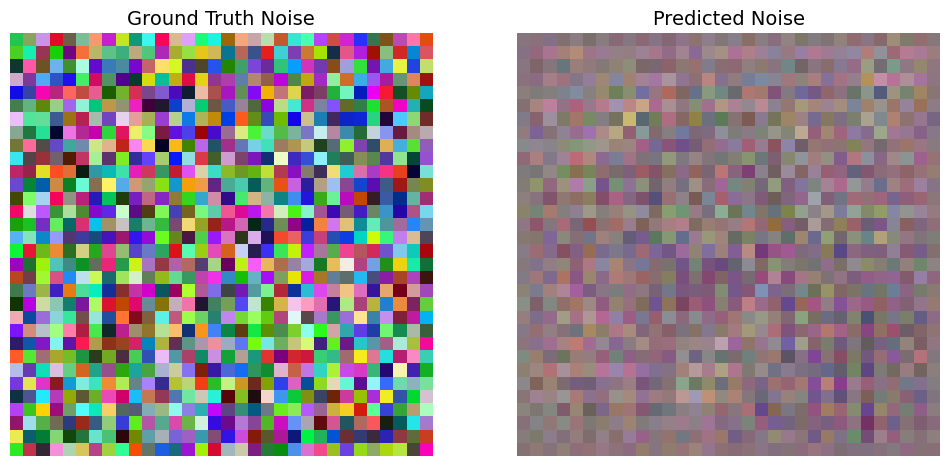

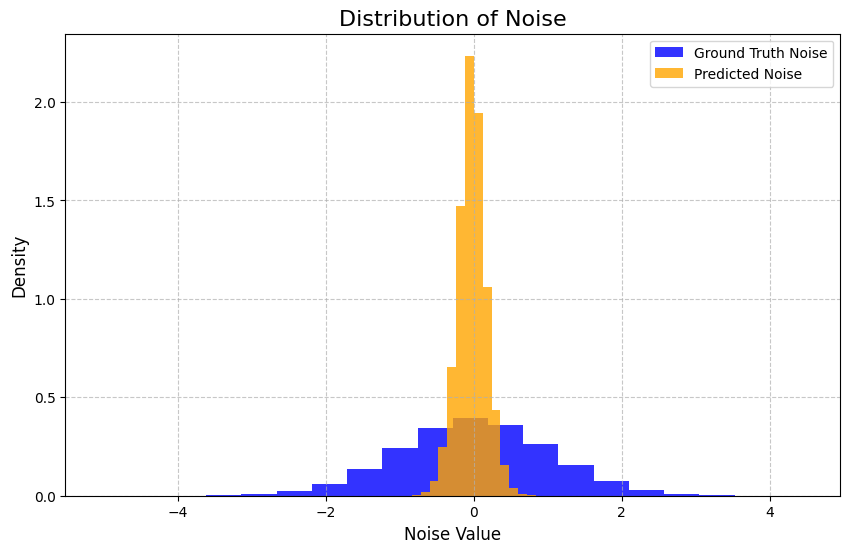

---
Epoch: 400 | Train Loss 0.015292893163859844


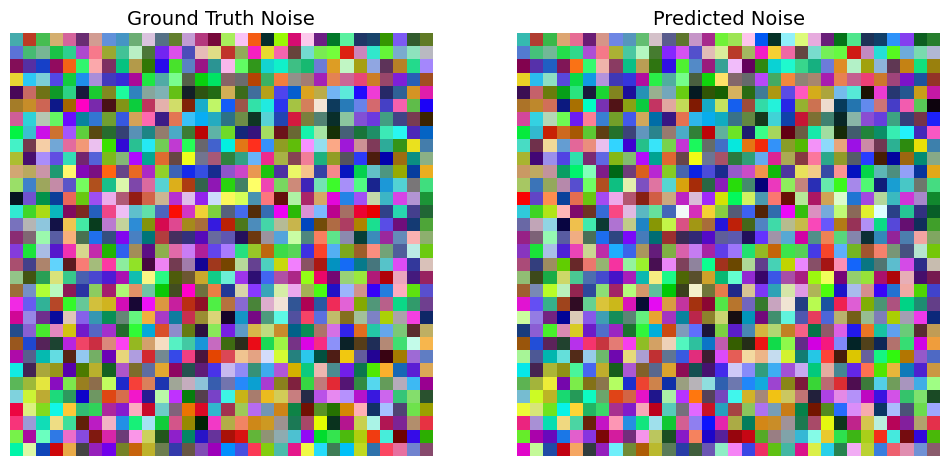

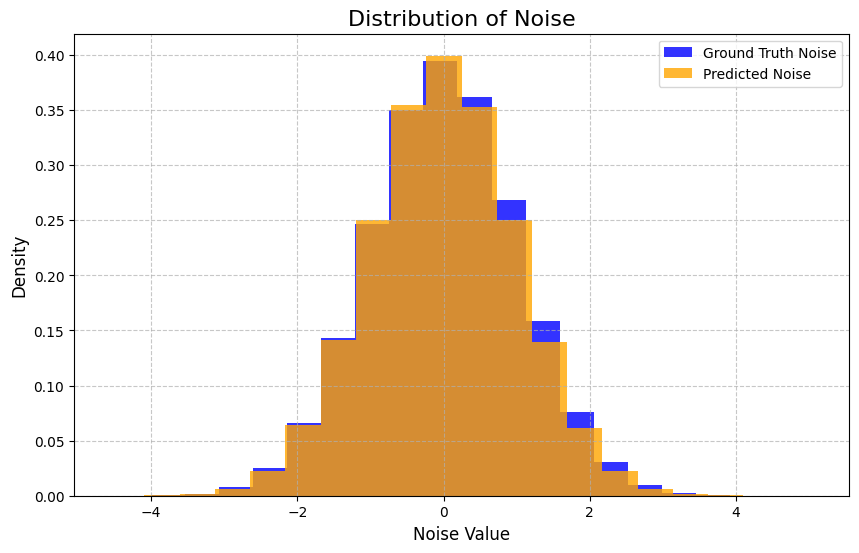

---
Epoch: 800 | Train Loss 0.008413623087108135


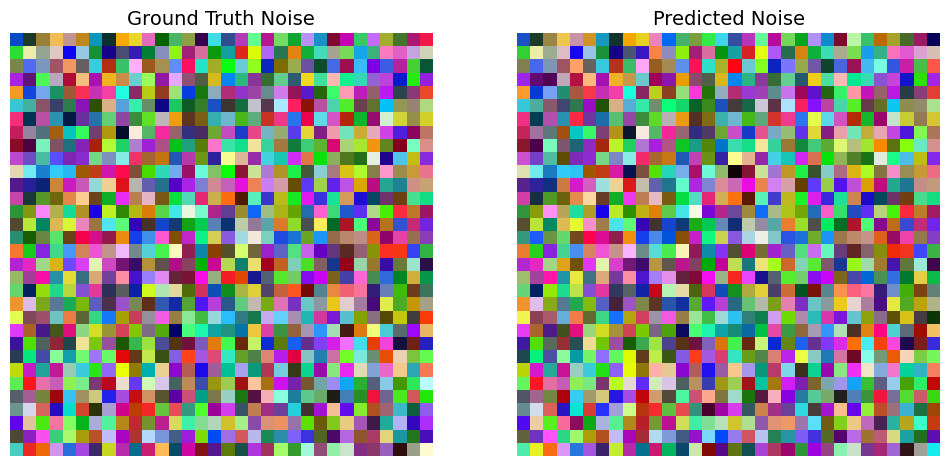

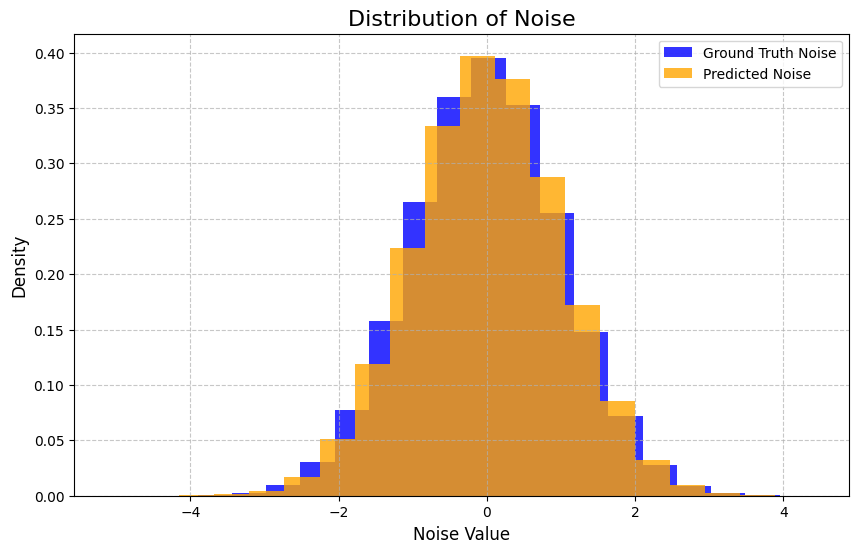

---
Epoch: 1200 | Train Loss 0.010737352073192596


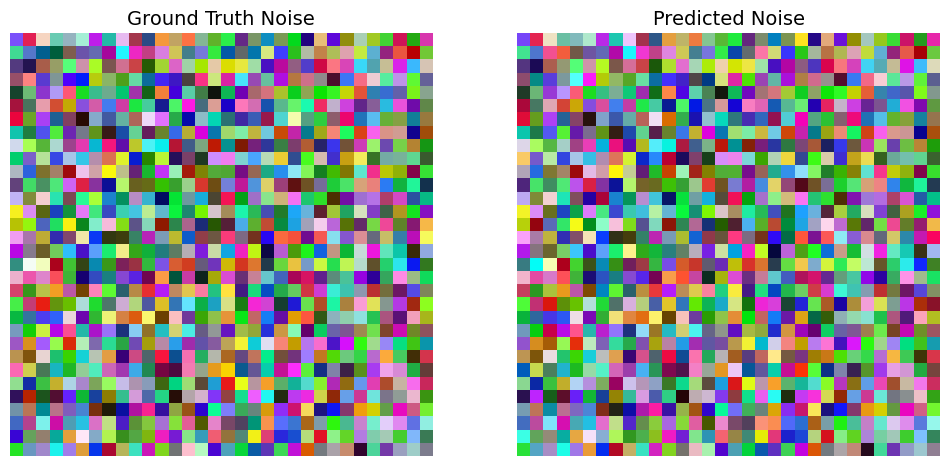

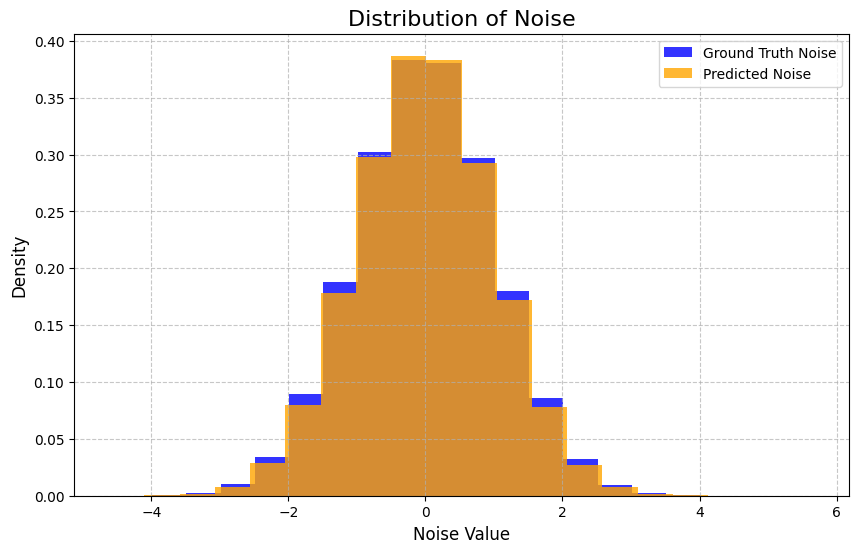

---
Epoch: 1600 | Train Loss 0.006262145470827818


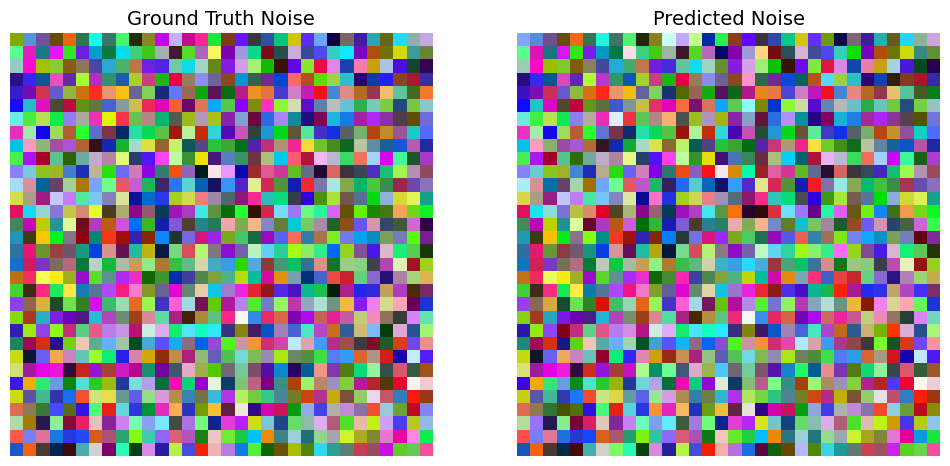

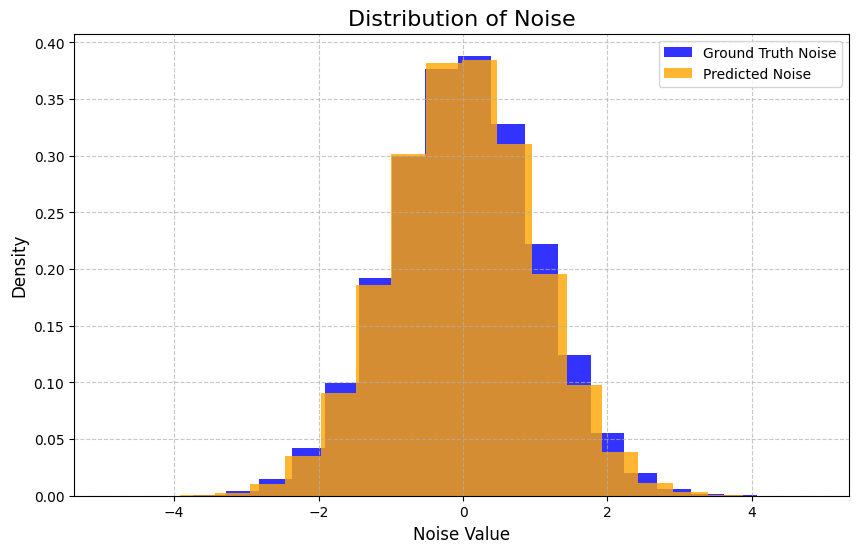

In [23]:
for epoch in range(NO_EPOCHS):
    mean_epoch_loss = []

    # Generating batch data
    batch = torch.stack([img] * BATCH_SIZE)
    t = torch.randint(0, diffusion_model.timesteps, (BATCH_SIZE,)).long().to(device)

    # Forward pass through diffusion model and U-Net
    batch_noisy, noise = diffusion_model.forward(batch, t, device)
    predicted_noise = unet(batch_noisy, t)

    # Calculating and backpropagating loss
    optimizer.zero_grad()
    loss = torch.nn.functional.mse_loss(noise, predicted_noise)
    mean_epoch_loss.append(loss.item())
    loss.backward()
    optimizer.step()

    # Printing epoch information
    if epoch % PRINT_FREQUENCY == 0:
        print('---')
        print(f"Epoch: {epoch} | Train Loss {np.mean(mean_epoch_loss)}")
        if VERBOSE:
            with torch.no_grad():
                plot_noise_prediction(noise[0], predicted_noise[0])
                plot_noise_distribution(noise, predicted_noise)


# Final Evaluation (Going From Noise to the Image)

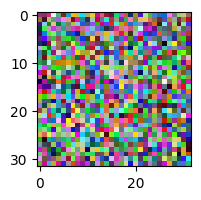

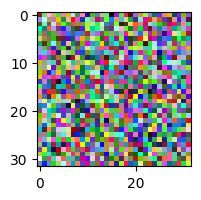

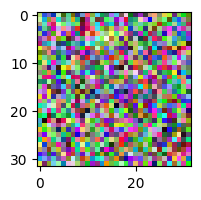

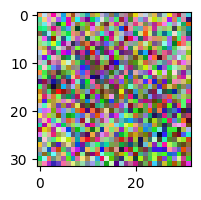

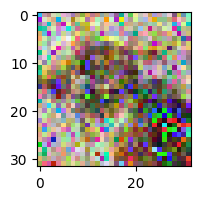

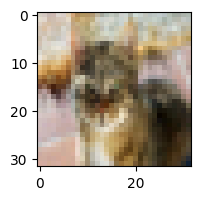

In [24]:
with torch.no_grad():
    img = torch.randn((1, 3) + IMAGE_SHAPE).to(device)
    for i in reversed(range(diffusion_model.timesteps)):
        t = torch.full((1,), i, dtype=torch.long, device=device)
        img = diffusion_model.backward(img, t, unet.eval())
        if i % 50 == 0:
            plt.figure(figsize=(2,2))
            plt.imshow(reverse_transforms(img[0]))
            plt.show()